Human Trafficking Analysis
---

###### Import the required libraries 

In [2]:
import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from pprint import pprint
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': '20',
          'figure.figsize': (15, 5),
         'axes.labelsize': '18',
         'axes.titlesize':'30',
         'xtick.labelsize':'16',
         'ytick.labelsize':'16'}
plt.rcParams.update(params)

plt.rcParams['text.color'] = '#A04000'
plt.rcParams['xtick.color'] = '#800000'
plt.rcParams['ytick.color'] = '#808000'
plt.rcParams['axes.labelcolor'] = '#283747'

In [3]:
data_df=pd.read_csv('data/human_trafficking.csv', low_memory= False)
data_df.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,meansOfControlConcatenated,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfExploitConcatenated,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfLabourConcatenated,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
1,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
2,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
3,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
4,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1


## Exploring the data

In [4]:
data_df.describe()

,yearOfRegistration,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
count,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.000000,48801.00000,48801.000000,48801.00000
mean,2014.144218,-93.910248,-90.834614,-98.484375,-88.442675,-86.615233,-89.088666,-93.244524,-91.153521,-91.834717,-87.508535,-93.904121,-92.226778,-98.691215,-94.910514,-93.729924,-92.315670,-92.672814,-23.684679,-45.848015,-50.265220,-36.092969,-51.414459,-76.628696,-75.771992,-75.771992,-95.771152,-57.466425,-57.546464,-57.571976,-56.778447,-53.195754,-55.015225,-57.733264,-57.312166,-57.575029,-57.731788,-57.575029,-55.007520,-55.112600,-61.465359,-85.924120,-85.927399,-88.419725,-65.788222,-17.832995,-17.823344,-17.82779,-17.774492,0.64720
std,4.025566,21.922926,27.338680,7.142809,30.690007,32.903795,29.840379,23.236696,26.849513,25.743183,31.853870,21.935427,25.081972,5.542640,19.741820,22.288547,24.926596,24.294202,42.876624,49.568009,49.826086,47.801919,49.465087,41.408492,41.953170,41.953170,17.606035,48.858433,48.844371,48.841042,48.988703,49.419270,49.194003,48.810984,48.889644,48.837412,48.812744,48.837412,49.196511,49.205669,48.126034,33.524384,33.515931,30.587780,46.744717,38.089505,38.094149,38.09201,38.117608,3.98111
min,2002.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.00000
25%,2013.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48801 entries, 0 to 48800
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   yearOfRegistration                      48801 non-null  int64 
 1   Datasource                              48801 non-null  object
 2   gender                                  48801 non-null  object
 3   ageBroad                                48801 non-null  object
 4   majorityStatus                          48801 non-null  object
 5   majorityStatusAtExploit                 48801 non-null  object
 6   majorityEntry                           48801 non-null  object
 7   citizenship                             48801 non-null  object
 8   meansOfControlDebtBondage               48801 non-null  int64 
 9   meansOfControlTakesEarnings             48801 non-null  int64 
 10  meansOfControlRestrictsFinancialAccess  48801 non-null  int64 
 11  me

#### Check for missing values

In [6]:
data_df.isna().sum()
# It shows no mising values, but Missing values are put with -99, so lets replace them with NaN

yearOfRegistration                        0
Datasource                                0
gender                                    0
ageBroad                                  0
majorityStatus                            0
majorityStatusAtExploit                   0
majorityEntry                             0
citizenship                               0
meansOfControlDebtBondage                 0
meansOfControlTakesEarnings               0
meansOfControlRestrictsFinancialAccess    0
meansOfControlThreats                     0
meansOfControlPsychologicalAbuse          0
meansOfControlPhysicalAbuse               0
meansOfControlSexualAbuse                 0
meansOfControlFalsePromises               0
meansOfControlPsychoactiveSubstances      0
meansOfControlRestrictsMovement           0
meansOfControlRestrictsMedicalCare        0
meansOfControlExcessiveWorkingHours       0
meansOfControlUsesChildren                0
meansOfControlThreatOfLawEnforcement      0
meansOfControlWithholdsNecessiti

In [37]:
data_df = data_df.replace(to_replace=-99, value=np.nan)
data_df = data_df.replace(to_replace="-99", value=np.nan)

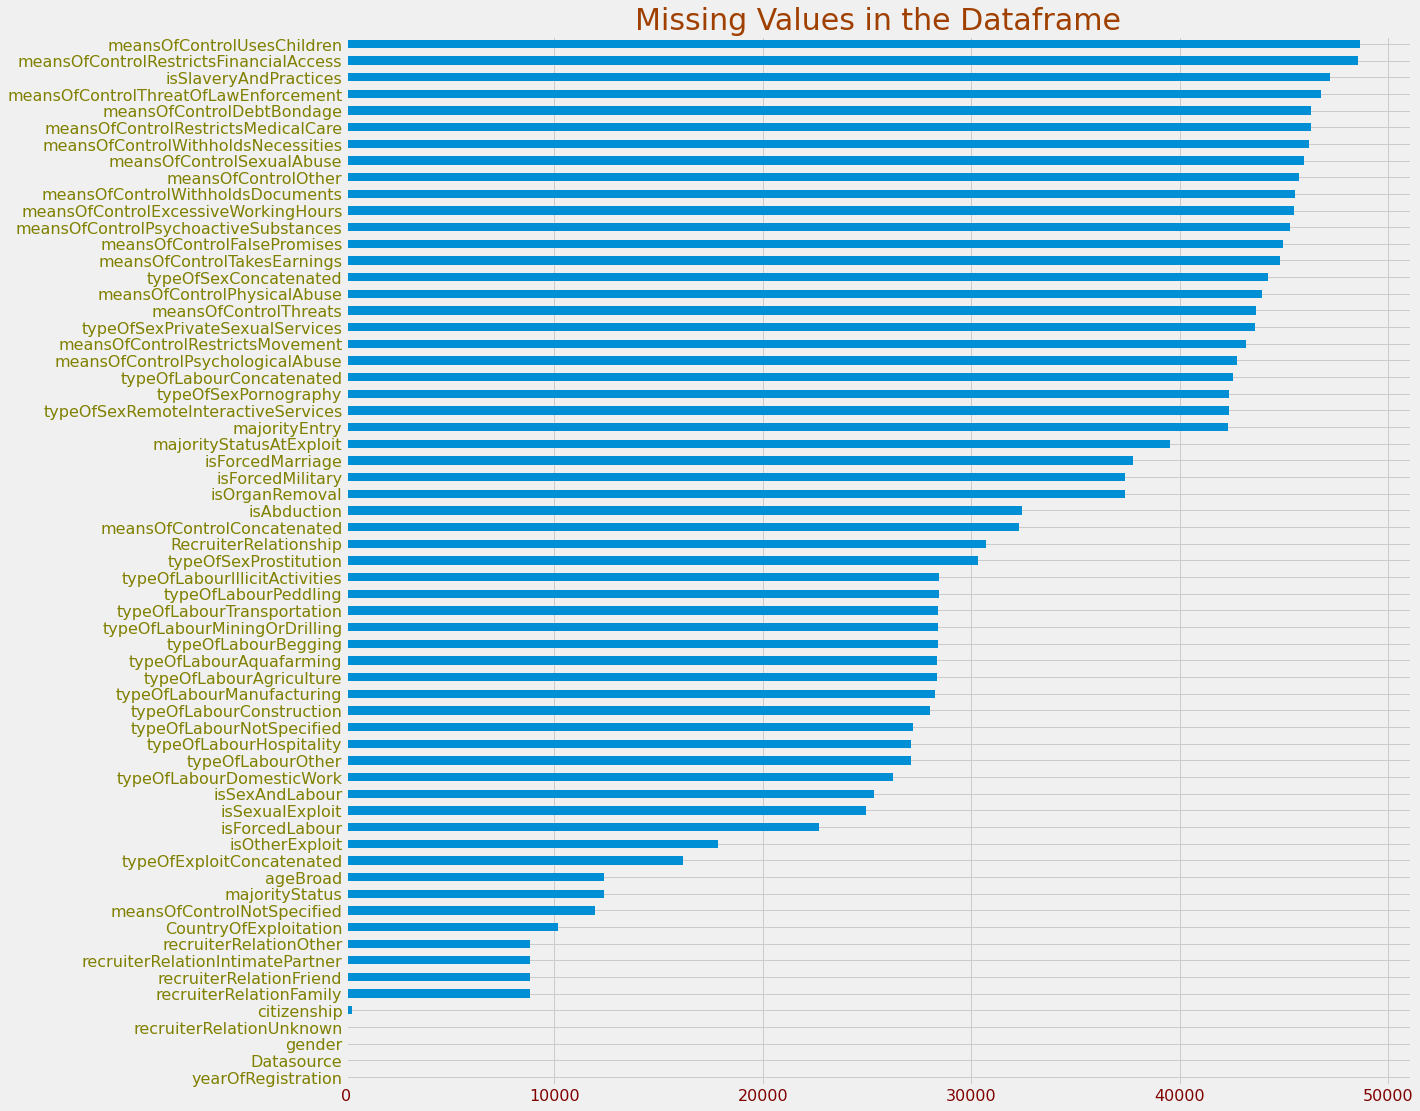

In [8]:
data_df.isna().sum().sort_values().plot(kind = 'barh', figsize = (17,18));
plt.title('Missing Values in the Dataframe');
plt.show();

With missing values taken care of, let's redescribe our data to gain more insight.

In [38]:
data_df.describe()

,yearOfRegistration,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
count,48801.000000,2496.000000,3997.000000,253.000000,5164.000000,6056.000000,4849.000000,2821.000000,3840.000000,3509.000000,5620.000000,2499.000000,3317.000000,151.000000,2008.000000,2584.000000,3274.000000,3100.000000,36857.000000,26102.000000,23861.000000,30938.000000,23456.000000,11026.000000,11450.0,11450.0,1588.000000,20472.000000,20433.000000,20420.000000,20800.000000,22551.000000,21681.000000,20342.0,20545.000000,20420.0,20342.000000,20420.0,21684.000000,21622.000000,18458.000000,6444.000000,6444.0,5215.000000,16371.000000,39994.000000,39994.000000,39994.000000,39994.000000,48724.000000
mean,2014.144218,0.513221,0.694521,0.458498,0.769171,0.800033,0.749020,0.565048,0.717708,0.650328,0.785587,0.513405,0.650286,0.794702,0.387948,0.529799,0.634087,0.604194,0.722251,0.374377,0.673358,0.228328,0.003325,0.015237,0.0,0.0,0.226071,0.007425,0.005237,0.007297,0.060288,0.121680,0.003782,0.0,0.022049,0.0,0.003539,0.0,0.007425,0.054158,0.237621,0.024829,0.0,0.008245,0.002382,0.040631,0.052408,0.046982,0.112017,0.804675
std,4.025566,0.499925,0.460668,0.499262,0.421404,0.400008,0.433622,0.495839,0.450173,0.476934,0.410451,0.499920,0.476951,0.405263,0.487404,0.499208,0.481759,0.489102,0.447895,0.483971,0.468995,0.419762,0.057571,0.122499,0.0,0.0,0.418417,0.085849,0.072177,0.085111,0.238026,0.326923,0.061384,0.0,0.146847,0.0,0.059390,0.0,0.085849,0.226334,0.425637,0.155617,0.0,0.090438,0.048752,0.197437,0.222851,0.211603,0.315391,0.396455
min,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2016.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00

## Subset the data for US only

In [9]:
# let's get just the US entries
USdf = data_df.loc[data_df["CountryOfExploitation"] == "US"]
USdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12512 entries, 18589 to 48772
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   yearOfRegistration                      12512 non-null  int64  
 1   Datasource                              12512 non-null  object 
 2   gender                                  12512 non-null  object 
 3   ageBroad                                12512 non-null  object 
 4   majorityStatus                          12512 non-null  object 
 5   majorityStatusAtExploit                 7235 non-null   object 
 6   majorityEntry                           558 non-null    object 
 7   citizenship                             12512 non-null  object 
 8   meansOfControlDebtBondage               403 non-null    float64
 9   meansOfControlTakesEarnings             801 non-null    float64
 10  meansOfControlRestrictsFinancialAccess  116 non-null  

### Exploratory Data Analysis

### 1. How many incidents of Trafficking were reported across the years?

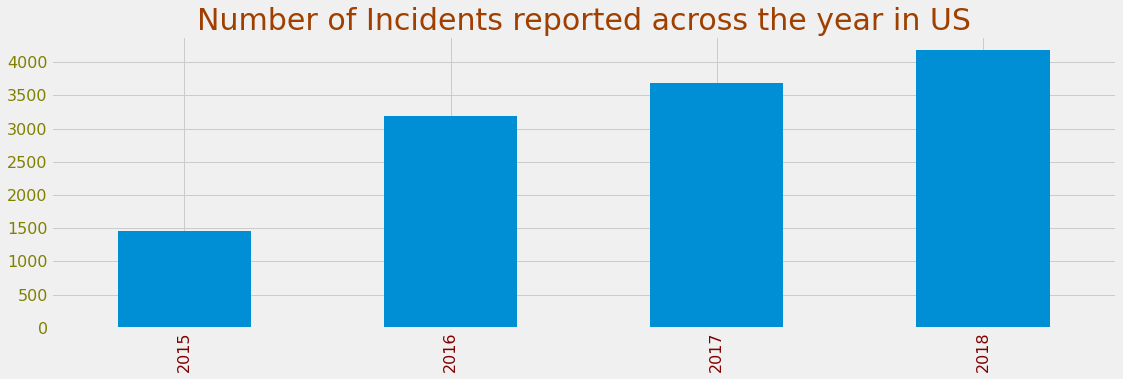

In [10]:
USdf['yearOfRegistration'].value_counts().sort_values().plot(kind = 'bar', figsize = (17,5));
plt.title('Number of Incidents reported across the year in US');
plt.show();

### 2. What is the ratio of Male to Female Victims?

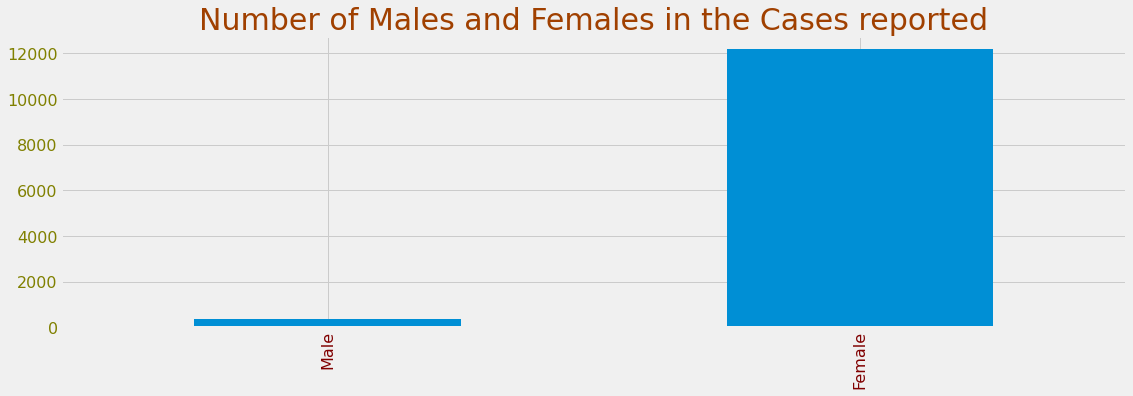

In [11]:
USdf['gender'].value_counts().sort_values().plot(kind = 'bar', figsize = (17,5));
plt.title('Number of Males and Females in the Cases reported');
plt.show();

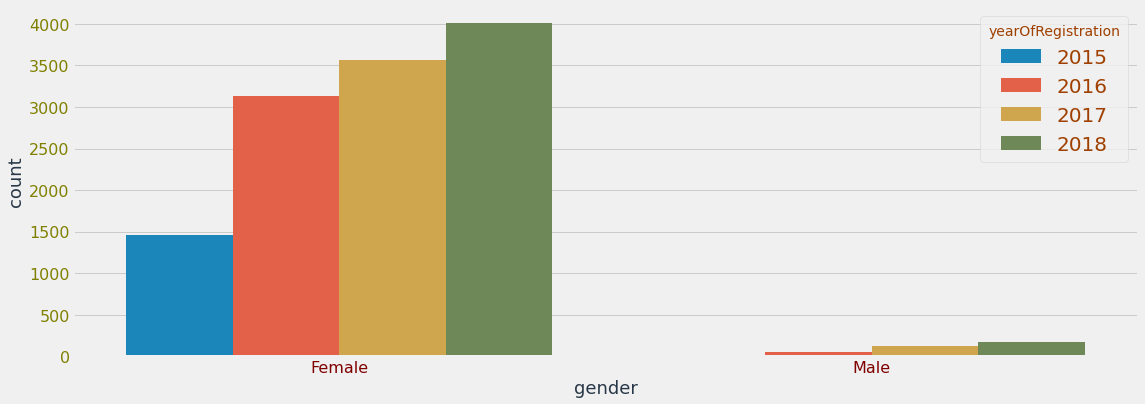

In [12]:
plt.figure(figsize = (17,6));
sns.countplot(x="gender", hue="yearOfRegistration", data=USdf);

### 3.	The most common type of control in human trafficking in the United States? 

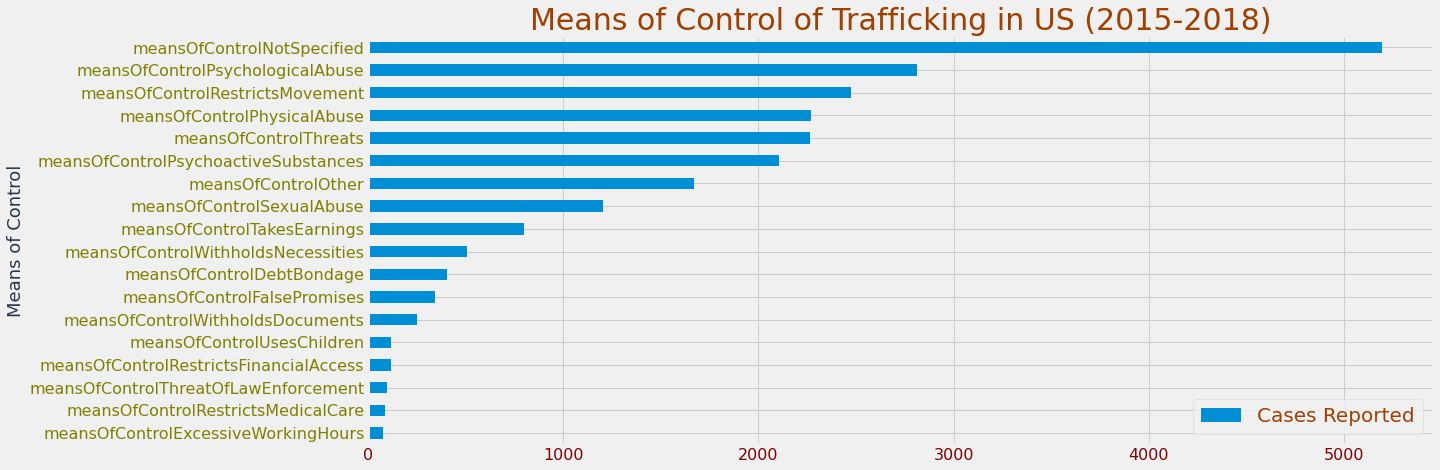

In [13]:
pd.options.mode.chained_assignment = None  # default='warn'
USdf['meansOfControlNotSpecified'] = USdf['meansOfControlNotSpecified'].replace(0.0, np.nan)
cols = [ 'meansOfControlDebtBondage', 'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess', 'meansOfControlThreats', 'meansOfControlPsychologicalAbuse', 'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse', 'meansOfControlFalsePromises',  'meansOfControlPsychoactiveSubstances', 'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare', 'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren', 'meansOfControlThreatOfLawEnforcement', 'meansOfControlWithholdsNecessities', 'meansOfControlWithholdsDocuments', 'meansOfControlOther', 'meansOfControlNotSpecified']
means_of_control = []
for col in cols:
    means_of_control.append(USdf[col].value_counts().values[0])
meansControlDF = pd.DataFrame({'Means of Control' : cols, 'Cases Reported' : means_of_control})
meansControlDF.set_index('Means of Control', inplace = True)
meansControlDF.sort_values(by = 'Cases Reported').plot(kind = 'barh', figsize = (17,7));
plt.title('Means of Control of Trafficking in US (2015-2018)');
plt.show();

### 4.	The most common type of human trafficking the United States? 

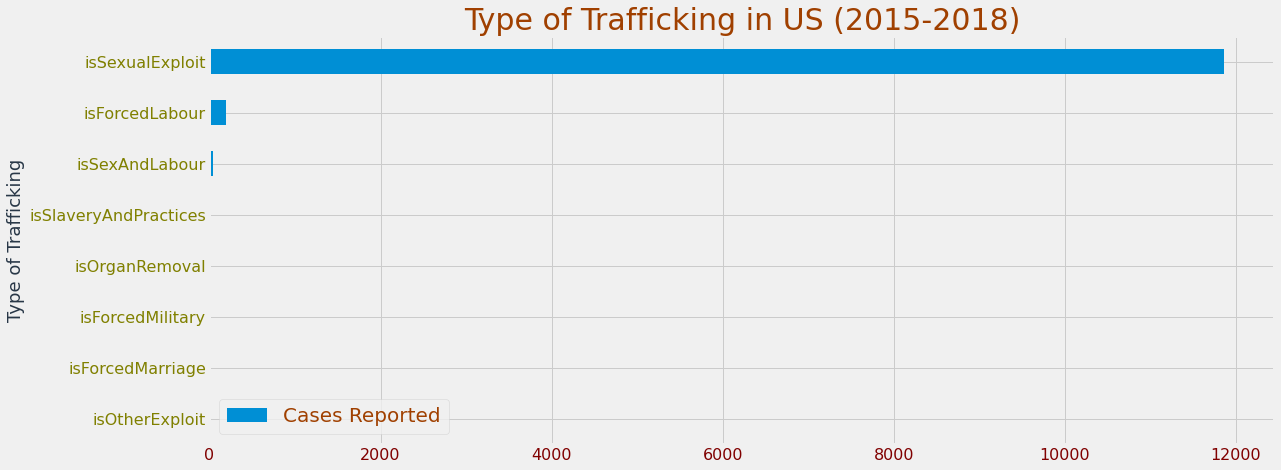

In [14]:
cols = ['isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour', 'isForcedMarriage', 'isForcedMilitary', 'isOrganRemoval', 'isSlaveryAndPractices']

type_of_trafficking = []
for col in cols:
    type_of_trafficking.append(USdf[col].sum())
meansControlDF = pd.DataFrame({'Type of Trafficking' : cols, 'Cases Reported' : type_of_trafficking})
meansControlDF.set_index('Type of Trafficking', inplace = True)
meansControlDF.sort_values(by = 'Cases Reported').plot(kind = 'barh', figsize = (17,7));
plt.title('Type of Trafficking in US (2015-2018)');
plt.show();

### 5.	The age group most affected by human trafficking?

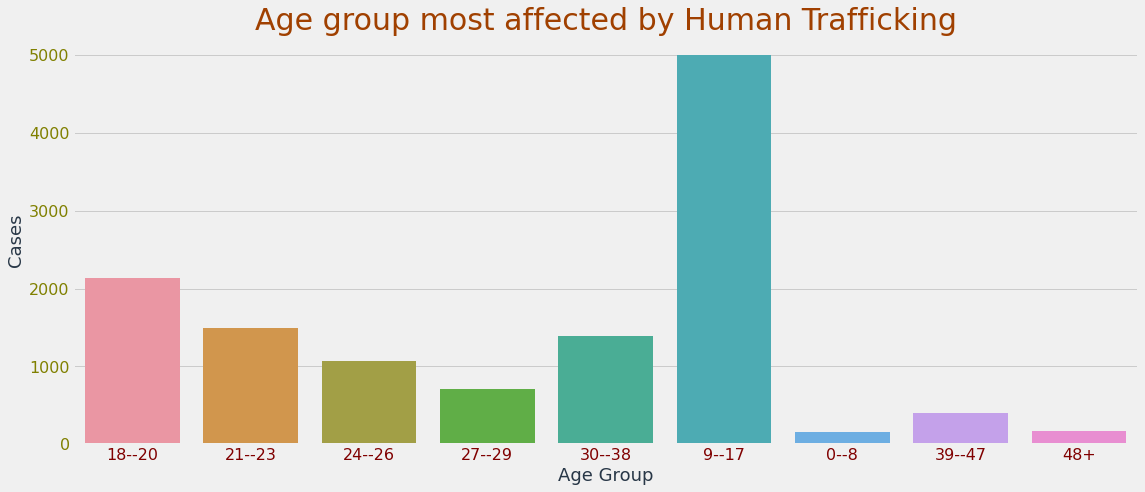

In [15]:
import seaborn as sns
plt.figure(figsize=(17,7))
sns.countplot(x="ageBroad", data=USdf);
plt.title("Age group most affected by Human Trafficking");
plt.xlabel("Age Group")
plt.ylabel("Cases")
plt.show();

### 6.	Is there a correlation between forced labor and sexual exploitation?

In [17]:
print("Correlation between forced labor and sexual exploitation", USdf['isForcedLabour'].corr(USdf['isSexualExploit']))

Correlation between forced labor and sexual exploitation -0.8737981939045911


The correlation is negative.

### 7.	Are victims most likely to be related to their abusers?

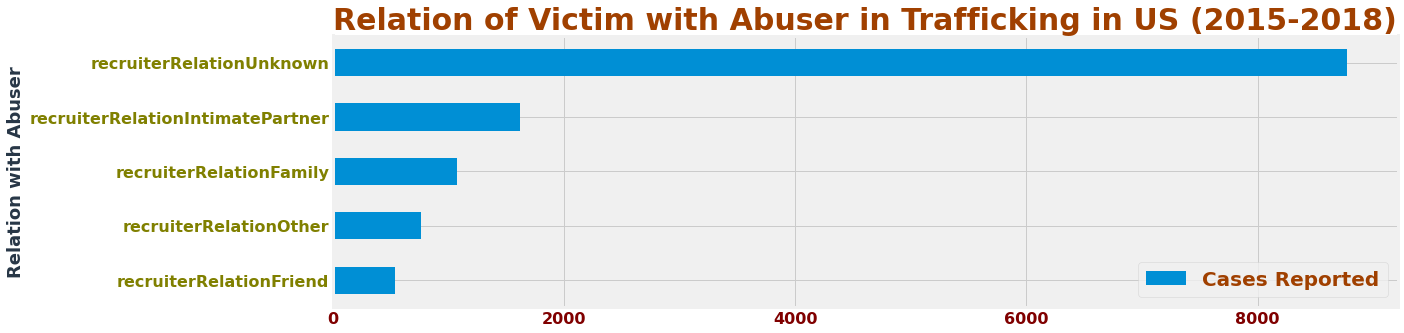

In [27]:
cols = ['recruiterRelationIntimatePartner', 'recruiterRelationFriend', 'recruiterRelationFamily', 'recruiterRelationOther', 'recruiterRelationUnknown']

abusers_relation = []

for col in cols:
    abusers_relation.append(USdf[col].sum())
meansControlDF = pd.DataFrame({'Relation with Abuser' : cols, 'Cases Reported' : abusers_relation})
meansControlDF.set_index('Relation with Abuser', inplace = True)
meansControlDF.sort_values(by = 'Cases Reported').plot(kind = 'barh', figsize = (17,5));
plt.title('Relation of Victim with Abuser in Trafficking in US (2015-2018)');
plt.show();

In [28]:
print("Percentage of Victims related with the Abusers : ", np.round(1-USdf['recruiterRelationUnknown'].sum()/len(USdf),3)*100, '%')

Percentage of Victims related with the Abusers :  29.9 %


# Remarks

Due to the nature of our data being mostly boolean values, certain operations could not be performed. We were not able to use PMF, or to create scatter plots. The data also did not allow us to create the cdf requested or to conducted regression analysis. 